In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [19]:
jpeg_map = pd.read_csv("../measurements/jpeg_sens/map.csv")
decom_map= pd.read_csv("../measurements/decomposition_sens/map.csv")
reg_map = pd.read_csv("../measurements/regression_sens/map.csv")
sketch_map = pd.read_csv("../measurements/sketchml_sens/map.csv")

jpeg_cha = pd.read_csv("../measurements/jpeg_sens/characteristic.csv")
decom_cha = pd.read_csv("../measurements/decomposition_sens/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression_sens/characteristic.csv")
sketch_cha = pd.read_csv("../measurements/sketchml_sens/characteristic.csv")

# jpeg_cha = jpeg_cha[jpeg_cha["sparsity"]>0]
# decom_cha = decom_cha[decom_cha["sparsity"]>0]
# reg_cha = reg_cha[reg_cha["sparsity"]>0]
# sketch_cha = sketch_cha[sketch_cha["sparsity"]>0]

In [20]:
jpeg_map.head()

,pruning_thresh,quality,sensitivity,map
0,0.05,60,0.745067,0.502351
1,0.05,70,0.771902,0.514051
2,0.05,80,0.775848,0.529428
3,0.05,90,0.772691,0.523467
4,0.05,100,0.769534,0.524498


In [21]:
jpeg_cha.head()

,pruning_thresh,quality,frame_id,sparsity,decomposability,regularity,pictoriality,datasize_est,datasize_real,reconstruct_snr
0,0.05,60,1,-1.0,-1.0,-1.0,-1.0,15168,15903,6.664355
1,0.05,60,2,-1.0,-1.0,-1.0,-1.0,10829,11564,-7.923645
2,0.05,60,3,-1.0,-1.0,-1.0,-1.0,13395,14130,-7.572399
3,0.05,60,4,-1.0,-1.0,-1.0,-1.0,13199,13934,-9.147485
4,0.05,60,5,-1.0,-1.0,-1.0,-1.0,5817,6552,-15.790584


In [22]:
pruning_general=0.35
pruning_regression = 0.35

Text(0.5, 0, 'Transferred data size [KB]')

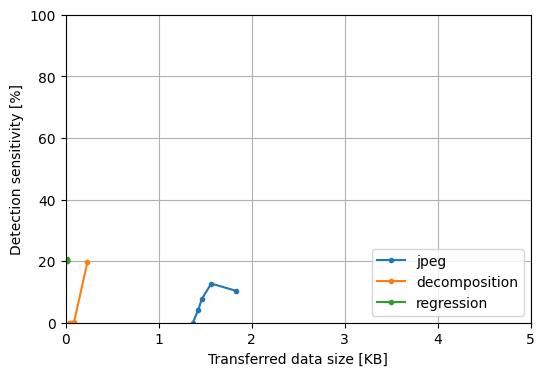

In [23]:
plt.figure(figsize=(6,4))
map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group = jpeg_cha.groupby("pruning_thresh")
keys = list(map_df_group.groups.keys())
map_df = map_df_group.get_group(pruning_general)
maps = map_df["sensitivity"].to_numpy()*100
cha_df = cha_df_group.get_group(pruning_general)
cha_df_g = cha_df.groupby("quality")
datasize = cha_df_g.mean()["datasize_est"].to_numpy()/1000
plt.plot(datasize,maps, marker="." ,color=colors[0],label="jpeg")

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group = decom_cha.groupby("pruning_thresh")
keys = list(map_df_group.groups.keys())
map_df = map_df_group.get_group(pruning_general)
maps = map_df["sensitivity"].to_numpy()*100
cha_df = cha_df_group.get_group(pruning_general)
cha_df_g = cha_df.groupby("quality")
datasize = cha_df_g.mean()["datasize_est"].to_numpy()/1000
plt.plot(datasize,maps, marker="." ,color=colors[1],label="decomposition")

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group = reg_cha.groupby("pruning_thresh")
keys = list(map_df_group.groups.keys())
map_df = map_df_group.get_group(pruning_regression)
maps = map_df["sensitivity"].to_numpy()*100
cha_df = cha_df_group.get_group(pruning_regression)
cha_df_g = cha_df.groupby("quality")
datasize = cha_df_g.mean()["datasize_est"].to_numpy()/1000
plt.plot(datasize,maps, marker="." ,color=colors[2],label="regression")

# map_df_group = sketch_map.groupby("pruning_thresh")
# cha_df_group = sketch_cha.groupby("pruning_thresh")
# keys = list(map_df_group.groups.keys())
# map_df = map_df_group.get_group(pruning_general)
# maps = map_df["sensitivity"].to_numpy()*100
# cha_df = cha_df_group.get_group(pruning_general)
# cha_df_g = cha_df.groupby("quality")
# datasize = cha_df_g.mean()["datasize_est"].to_numpy()/1000
# plt.plot(datasize,maps, marker="." ,color=colors[3],label="sketchML")


no_split_map_30 = 0.524
# plt.scatter(0,no_split_map_30*100,60,marker="*",color="tab:pink",label="No split")

plt.legend(loc="lower right")
plt.grid()
plt.ylim([0,100])
plt.xlim([0,5])
# plt.autoscale(axis="x",tight=True)
plt.ylabel("Detection sensitivity [%]")
plt.xlabel("Transferred data size [KB]")